In [1]:
!date
!pwd

Пнд Май 22 20:33:17 MSK 2017
/home/sphere/github/Sphere/separate


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import math as mt
import numpy as np

In [5]:
datum = pd.read_csv('01Events.dat', index_col=0)
print(datum.shape)
datum[:5]

(575, 25)


,Type,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,delay,H,UTC,...,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n,Crit1,Crit2
EID,,,,,,,,,,,,,,,,,,,,,
10675,E,10,688,242,241,242,241,360,307.8,2013-03-09 18:16:20,...,3.562,9.965,31.0,0.204204,0.766965,1.802776,34.0,32.0,2.497441,2.845292
10677,E,29,1336,241,240,243,240,112,307.8,2013-03-09 18:18:12,...,53.317,501.569,51.0,0.486947,1.157275,1.519109,56.0,13.0,5.654537,27.097272
10679,D,76,7143,242,250,252,242,13,307.6,2013-03-09 18:18:25,...,600.431,2820.565,9.0,1.193805,2.939874,1.058301,14.0,25.0,0.201590,1.311606
10683,E,22,505,236,243,472,236,181,305.9,2013-03-09 18:32:54,...,30.208,663.708,2.0,1.146681,1.483240,1.927248,5.0,7.0,0.928107,18.222066
10685,E,15,6588,242,242,242,242,1160,308.1,2013-03-09 18:52:14,...,33.247,1022.189,81.0,0.329867,0.681385,1.568929,84.0,39.0,4.959357,47.367534


In [7]:
print(datum.columns)

Index(['Type', 'Dt', 'Atotal', 'TG5time', 'TL2time', 'TL3time', 'TRIGGER',
       'delay', 'H', 'UTC', 'EAS', 'SNRatio_s', 'SNRatio_n', 'AbsSignal_s',
       'AbsSignal_n', 'TotalNoise_s', 'TotalNoise_n', 'NNear3', 'Theta',
       'dt2_s', 'dt2_n', 'ng_s', 'ng_n', 'Crit1', 'Crit2'],
      dtype='object')


In [8]:
param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s',       
       'TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n', 'Crit1', 'Crit2',
       'Dt', 'Atotal','delay'] 
len(param)

17

In [10]:
x_data_v = datum[param]

In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

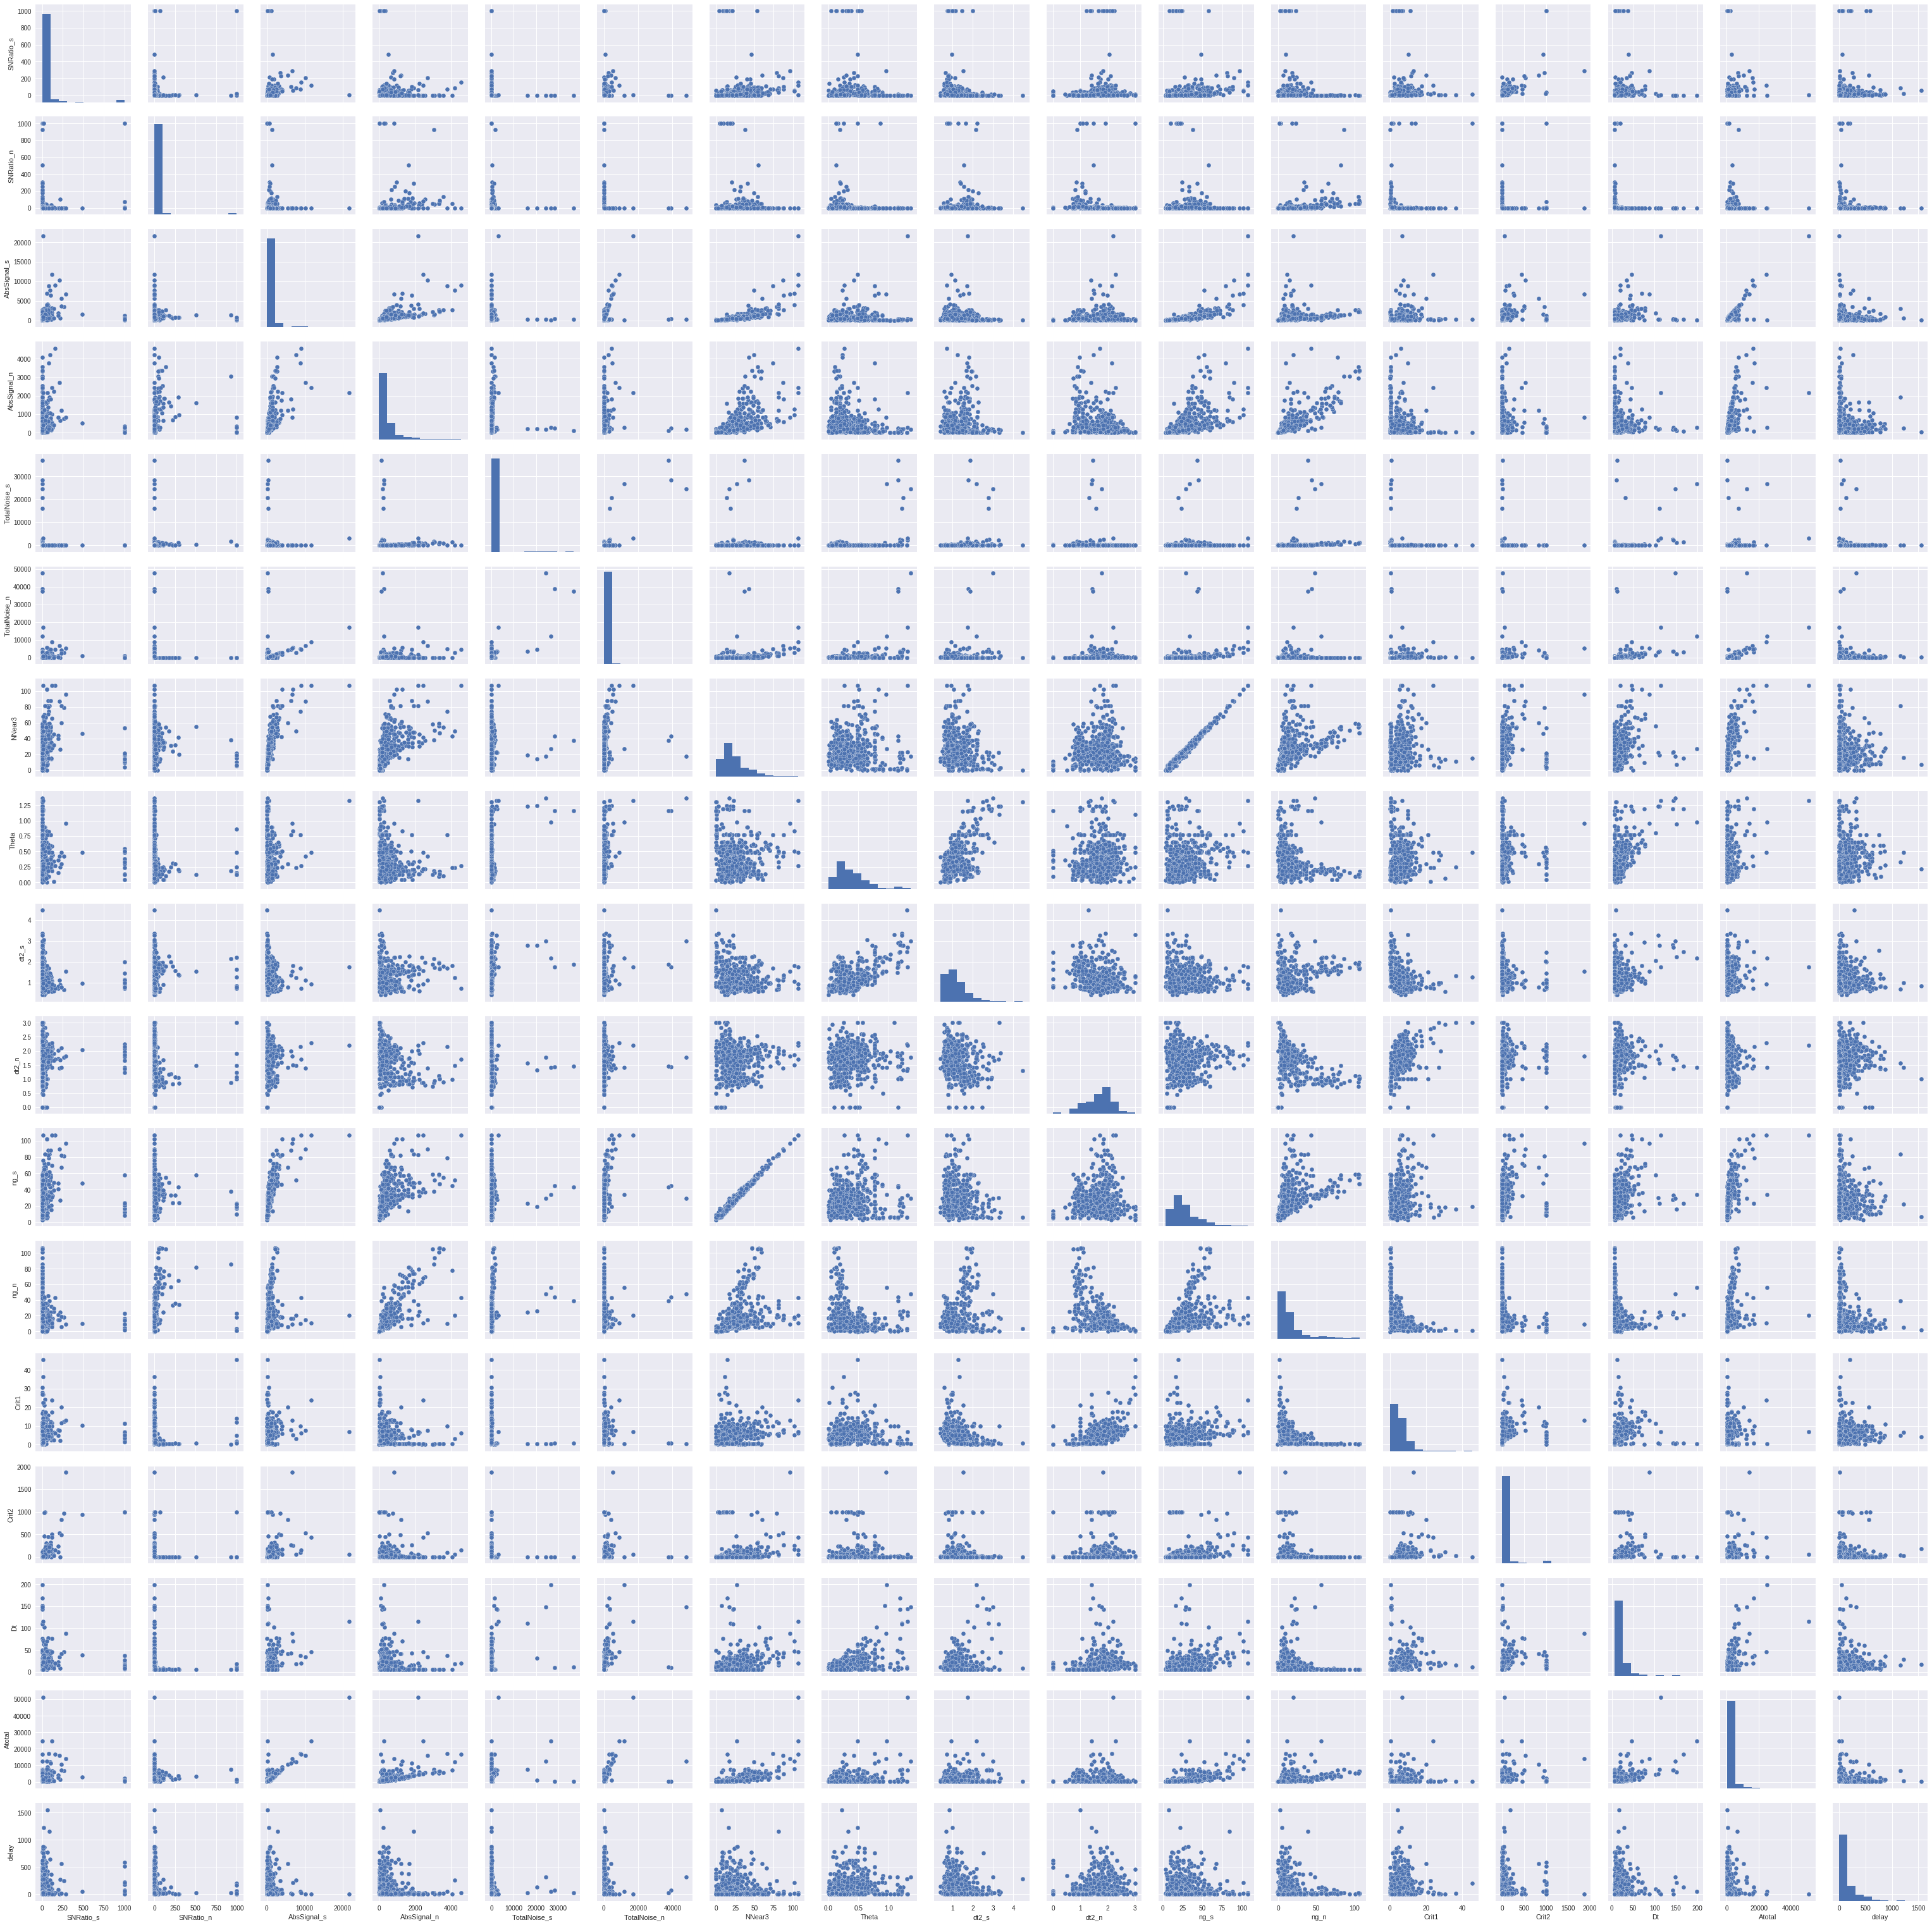

In [33]:
sns_plot = sns.pairplot(datum[param])

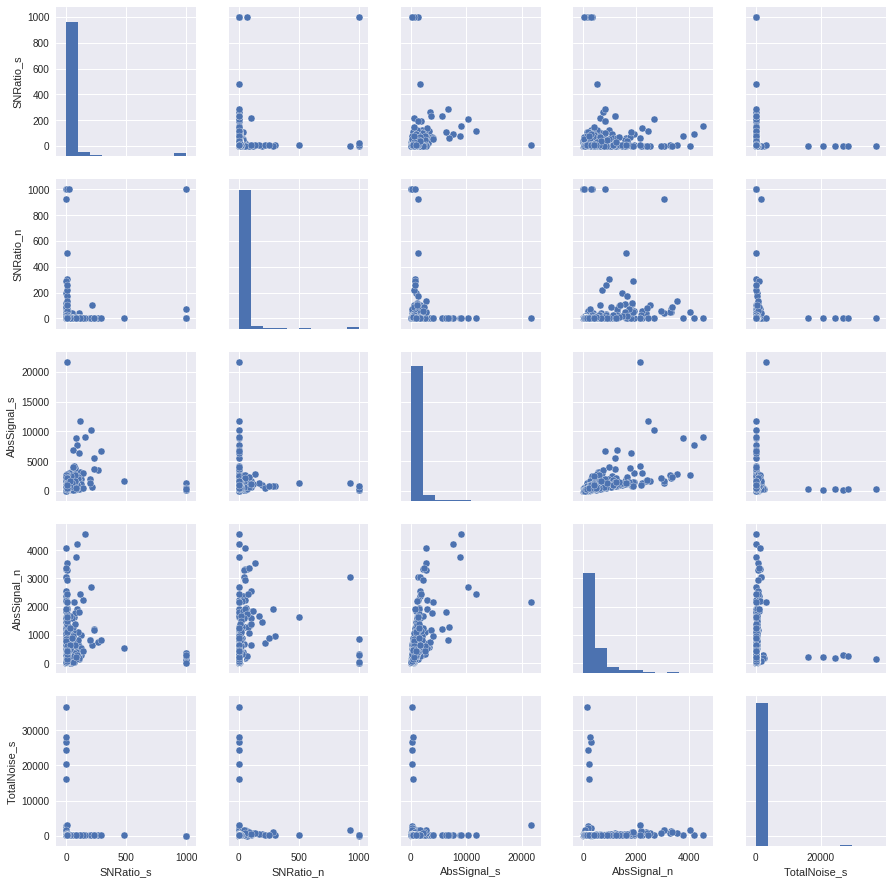

In [21]:
cols = ['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s']
sns_plot = sns.pairplot(datum[cols])

### Удалить выбросы

In [59]:
dat_minus=datum[:][datum.SNRatio_s < 450]
dat_minus=dat_minus[:][dat_minus.SNRatio_n < 450]
dat_minus=dat_minus[:][dat_minus.TotalNoise_s < 14000]

In [60]:
print(len(datum))
print(len(dat_minus))

575
547


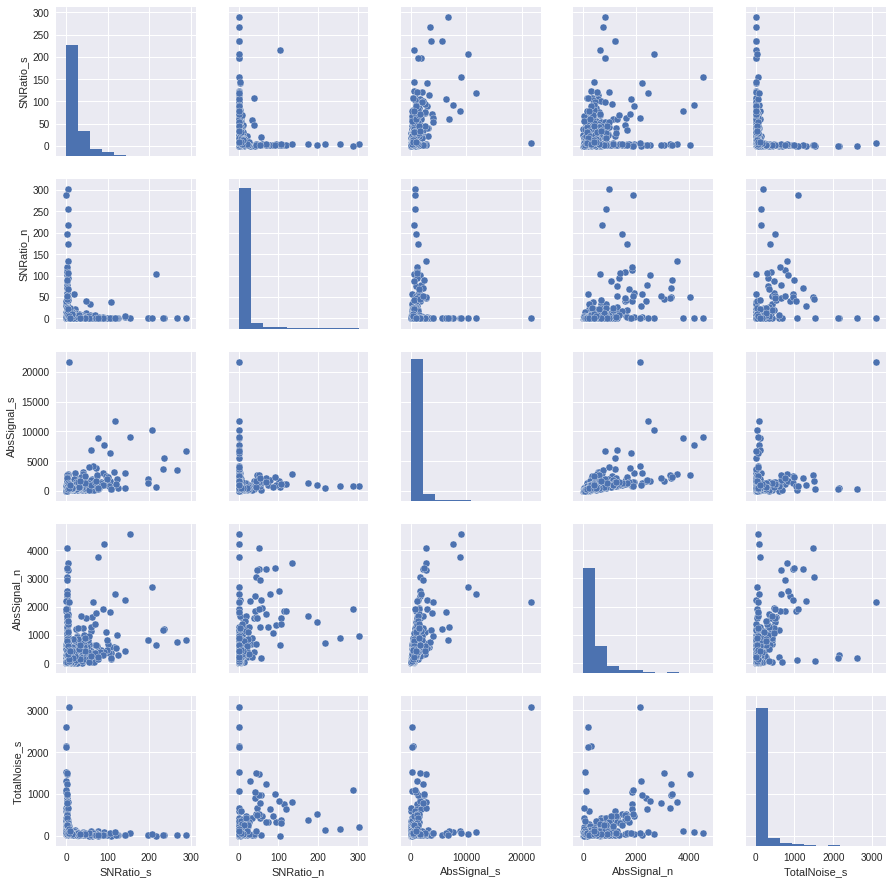

In [61]:
cols = ['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s']
sns_plot = sns.pairplot(dat_minus[cols])

### Нормировать  признаки

In [27]:
X_MinMax = MinMaxScaler().fit_transform(x_data_v)
x_minmax = pd.DataFrame(data=X_MinMax, columns = param)

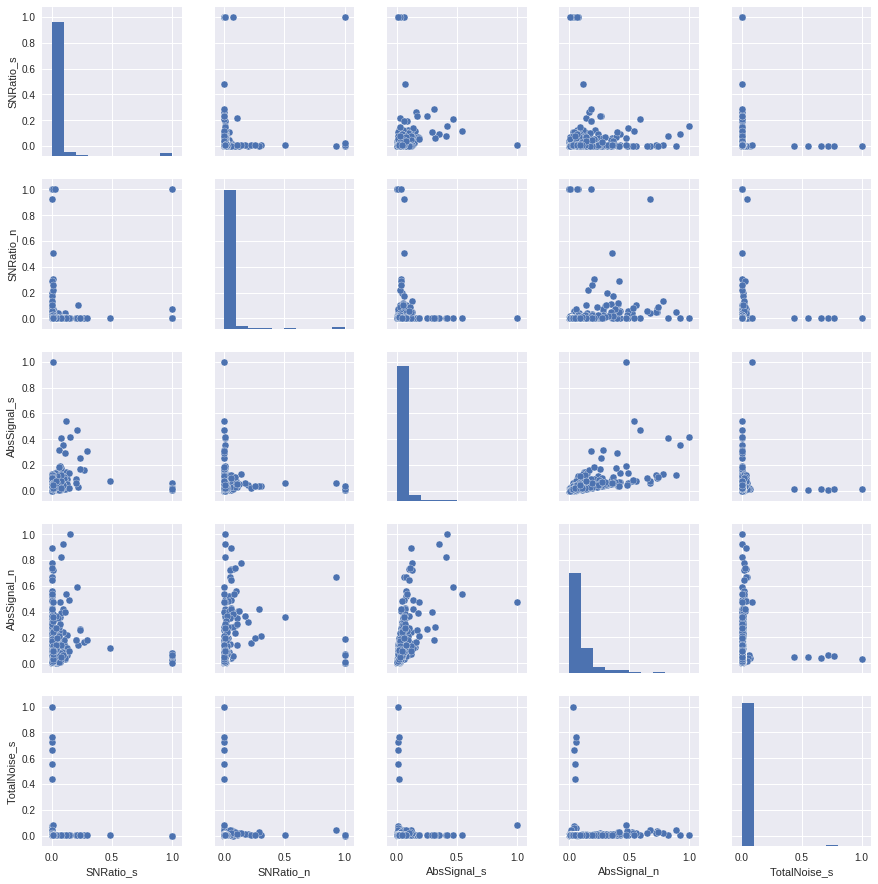

In [29]:
sns_plot = sns.pairplot(x_minmax[cols])

In [31]:
X_Scaled = StandardScaler().fit_transform(x_data_v)
x_scaled = pd.DataFrame(data=X_MinMax, columns = param)

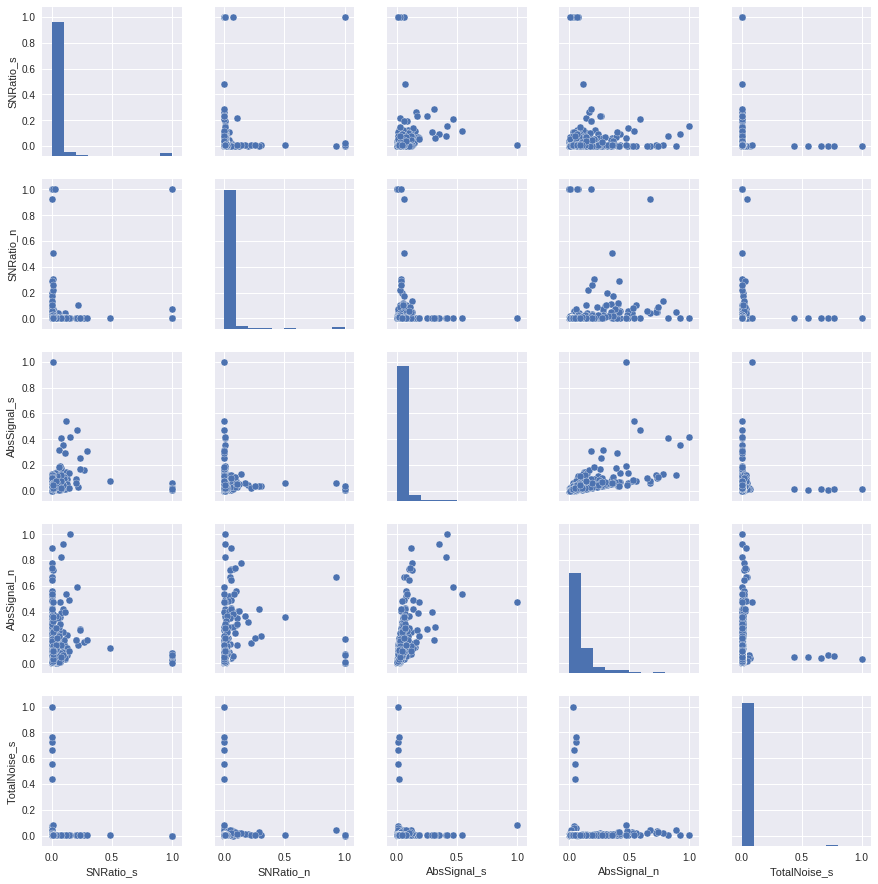

In [32]:
sns_plot = sns.pairplot(x_scaled[cols])